In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from quant_rotor.core.hamiltonian import hamiltonian
from quant_rotor.core.hamiltonian_big import hamiltonian_general, hamiltonian_big
from quant_rotor.core.t_amplitudes_periodic import t_periodic
from quant_rotor.models.density_matrix import density_matrix_1
from quant_rotor.models.t_amplitudes_guess import intermediate_normalisation, t_1_amplitude_guess_ground_state, t_2_amplitude_guess_ground_state, amplitute_energy

In [3]:
def load_one_simulation_NO(sites: int, states: int, g: float, directory: str = ".") -> dict:
    """
    Loads eigenvalues, eigenvectors, and NO basis matrix for a specific (sites, states, g) system.

    Returns a dictionary with 'eigvals', 'eigvecs', and 'NO_basis'.
    """
    g_str = f"{g:.1f}"
    base = f"sites{sites}_states{states}_g{g_str}"

    eigvals_path = os.path.join(directory, f"NO_eigvals_{base}.npy")
    eigvecs_path = os.path.join(directory, f"NO_eigvecs_{base}.npy")
    NO_basis_path = os.path.join(directory, f"NO_basis_{base}.npy")

    try:
        eigvals = np.load(eigvals_path)
        eigvecs = np.load(eigvecs_path)
        NO_basis = np.load(NO_basis_path)

        return eigvals, eigvecs, NO_basis

    except FileNotFoundError as e:
        print(f"[Error] Missing file for (sites={sites}, states={states}, g={g_str}): {e}")
        return {}

In [4]:
def load_one_simulation_ED(sites: int, states: int, g: float, directory: str = ".") -> dict:
    """
    Loads eigenvalues, eigenvectors, and NO basis matrix for a specific (sites, states, g) system.

    Returns a dictionary with 'eigvals', 'eigvecs', and 'NO_basis'.
    """
    g_str = f"{g:.1f}"
    base = f"sites{sites}_states{states}_g{g_str}"

    eigvals_path = os.path.join(directory, f"eigvals_{base}.npy")
    eigvecs_path = os.path.join(directory, f"eigvecs_{base}.npy")

    try:
        eigvals = np.load(eigvals_path)
        eigvecs = np.load(eigvecs_path)

        return eigvals, eigvecs

    except FileNotFoundError as e:
        print(f"[Error] Missing file for (sites={sites}, states={states}, g={g_str}): {e}")
        return None

In [5]:
def load_one_simulation_t_amplitudes(sites: int, states: int, g: float, directory: str = ".") -> dict:
    """
    Loads eigenvalues, eigenvectors, and NO basis matrix for a specific (sites, states, g) system.

    Returns a dictionary with 'eigvals', 'eigvecs', and 'NO_basis'.
    """
    g_str = f"{g:.2f}"
    base = f"sites{sites}_states{states}_g{g_str}"

    t_1_path = os.path.join(directory, f"t_1{base}.npy")
    t_2_path = os.path.join(directory, f"t_2{base}.npy")

    try:
        t_1 = np.load(t_1_path)
        t_2 = np.load(t_2_path)

        return t_1, t_2

    except FileNotFoundError as e:
        print(f"[Error] Missing file for (sites={sites}, states={states}, g={g_str}): {e}")
        return {}

In [6]:
def scatter_and_fit(g, y, label, color, degree=3):
    # Scatter plot
    plt.scatter(g, y, label=label + " (data)", color=color, s=30)

    # Polynomial fit
    coeffs = np.polyfit(g, y, degree)
    poly_fn = np.poly1d(coeffs)
    g_smooth = np.linspace(g.min(), g.max(), 200)
    y_smooth = poly_fn(g_smooth)

    # Plot fit
    plt.plot(g_smooth, y_smooth, linestyle='--', color=color)

In [7]:
def bar(g, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO):
    
    bar_width = 0.02

    # Offsets for each bar within the group
    x1 = g - 1.5 * bar_width
    x2 = g - 0.5 * bar_width
    x3 = g + 0.5 * bar_width
    x4 = g + 1.5 * bar_width

    # Use consistent colors
    colors = ['blue', 'orange', 'green', 'red']
    
    # Plot bars
    plt.bar(x1, si3_st11_ED, width=bar_width, label='Site 3 State 11 ED', color = colors[0])
    plt.bar(x2, si3_st5_NO, width=bar_width, label='Site 3 State 5 NO', color = colors[1])
    plt.bar(x3, si5_st5_NO, width=bar_width, label='Site 5 State 5 NO', color = colors[2])
    plt.bar(x4, si7_st3_NO, width=bar_width, label='Site 7 State 3 NO', color = colors[3])

In [8]:
file_path_ED = "./ED_analisis_data"

In [9]:
g_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5]

# Two smallest energy states gap.

In [10]:
si3_st11_ED = []
si3_st5_NO = []
si5_st5_NO = []
si7_st3_NO = []

for g_index in range(12):
    g = g_array[g_index]

    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    index_array = np.argsort(eig_val)
    delta_energy_3_ED = eig_val[index_array[1]] - eig_val[index_array[0]]

    si3_st11_ED.append(delta_energy_3_ED)

    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    index_array = np.argsort(eig_val)
    delta_energy_NO = eig_val[index_array[1]] - eig_val[index_array[0]]

    si3_st5_NO.append(delta_energy_NO)

    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    index_array = np.argsort(eig_val)
    delta_energy_NO = eig_val[index_array[1]] - eig_val[index_array[0]]

    si5_st5_NO.append(delta_energy_NO)
    
    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    index_array = np.argsort(eig_val)
    delta_energy_7_NO = eig_val[index_array[1]] - eig_val[index_array[0]]

    si7_st3_NO.append(delta_energy_NO)
    

[Error] Missing file for (sites=3, states=11, g=0.1): [Errno 2] No such file or directory: './ED_analisis_data/eigvecs_sites3_states11_g0.1.npy'


TypeError: cannot unpack non-iterable NoneType object

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


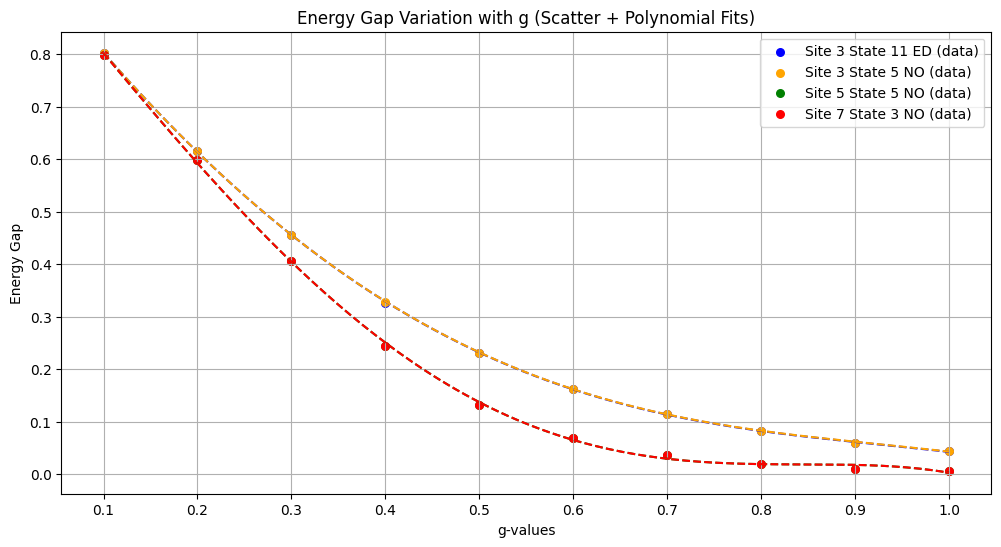

In [ ]:
si3_st11_ED = np.array(si3_st11_ED)
si3_st5_NO = np.array(si3_st5_NO)
si5_st5_NO = np.array(si5_st5_NO)
si7_st3_NO = np.array(si7_st3_NO)
g_array = np.array(g_array)

# plt.figure(figsize=(12, 6))

# bar(g_array, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO)

# # Axis formatting
# plt.xticks(g_array)
# plt.xlabel("g-values")
# plt.ylabel("Energy Gap")
# plt.title("Energy Gap variation with g.")
# plt.legend()

# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red']

scatter_and_fit(g_array, si3_st11_ED, 'Site 3 State 11 ED', colors[0], 4)
scatter_and_fit(g_array, si3_st5_NO,  'Site 3 State 5 NO',  colors[1], 4)
scatter_and_fit(g_array, si5_st5_NO,  'Site 5 State 5 NO',  colors[2], 4)
scatter_and_fit(g_array, si7_st3_NO,  'Site 7 State 3 NO',  colors[3], 4)

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("Energy Gap")
plt.title("Energy Gap Variation with g (Scatter + Polynomial Fits)")
plt.legend()
plt.grid(True)
plt.show()

# Ground State energy per site.

In [ ]:
si3_st11_ED = []
si3_st5_NO = []
si5_st5_NO = []
si7_st3_NO = []

for g_index in range(12):
    g = g_array[g_index]

    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    index_array = np.argsort(eig_val)
    ground_energy = eig_val[index_array[0]]/3

    si3_st11_ED.append(ground_energy)

    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    index_array = np.argsort(eig_val)
    ground_energy = eig_val[index_array[0]]/3

    si3_st5_NO.append(ground_energy)

    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    index_array = np.argsort(eig_val)
    ground_energy = eig_val[index_array[0]]/5

    si5_st5_NO.append(ground_energy)
    
    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    index_array = np.argsort(eig_val)
    ground_energy = eig_val[index_array[0]]/7

    si7_st3_NO.append(ground_energy)


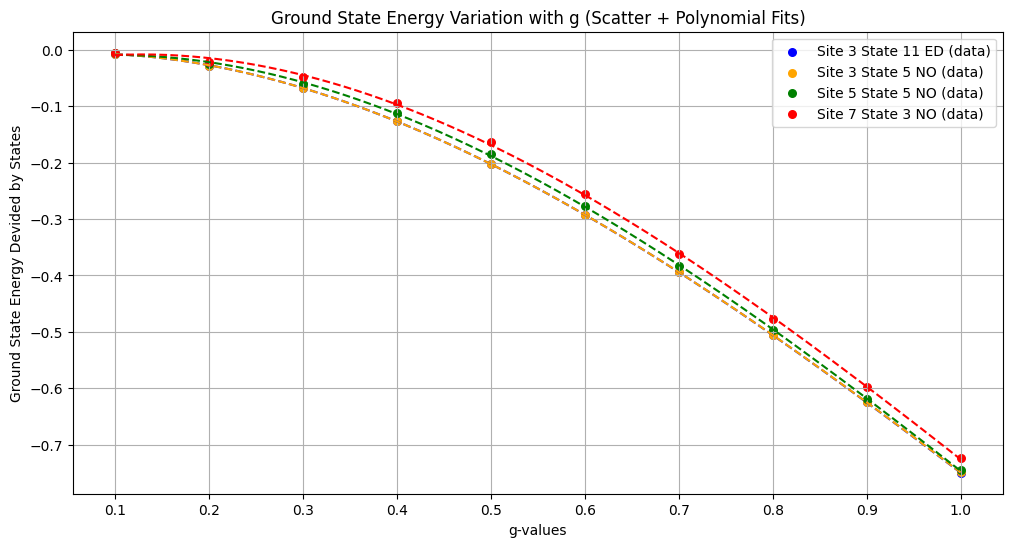

In [ ]:
si3_st11_ED = np.array(si3_st11_ED)
si3_st5_NO = np.array(si3_st5_NO)
si5_st5_NO = np.array(si5_st5_NO)
si7_st3_NO = np.array(si7_st3_NO)
g_array = np.array(g_array)

# plt.figure(figsize=(12, 6))

# bar(g_array, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO)

# # Axis formatting
# plt.xticks(g_array)
# plt.xlabel("g-values")
# plt.ylabel("Ground State Energy Devided by States")
# plt.title("Ground State Energy Variation with g.")
# plt.legend()

# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red']

scatter_and_fit(g_array, si3_st11_ED, 'Site 3 State 11 ED', colors[0])
scatter_and_fit(g_array, si3_st5_NO,  'Site 3 State 5 NO',  colors[1])
scatter_and_fit(g_array, si5_st5_NO,  'Site 5 State 5 NO',  colors[2])
scatter_and_fit(g_array, si7_st3_NO,  'Site 7 State 3 NO',  colors[3])

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("Ground State Energy Devided by States")
plt.title("Ground State Energy Variation with g (Scatter + Polynomial Fits)")
plt.legend()
plt.grid(True)
plt.show()

# Energy gap for two smallest non-zero eigenstates.

In [ ]:
def find_two_smallest_with_indices(eig_val, eig_vec_cut):
    filtered = [(val, idx) for idx, (val, mask) in enumerate(zip(eig_val, eig_vec_cut)) if mask != 0]
    if len(filtered) < 2:
        raise ValueError("Not enough non-zero matches.")
    filtered.sort()
    return filtered[:2]

In [ ]:
si3_st11_ED = []
si3_st5_NO = []
si5_st5_NO = []
si7_st3_NO = []

for g_index in range(12):
    g = g_array[g_index]

    print("g-val:", g)

    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    E_diff = find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][0] - find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][0]

    print("Energy gap 3 sites 11 states:", E_diff)

    si3_st11_ED.append(E_diff)

    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    E_diff = find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][0] - find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][0]

    print("Energy gap 3 sites:", E_diff)

    si3_st5_NO.append(E_diff)

    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    E_diff = find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][0] - find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][0]

    print("Energy gap 5 sites:", E_diff)

    si5_st5_NO.append(E_diff)
    
    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    E_diff = find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][0] - find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][0]

    print("Energy gap 7 sites:", E_diff)

    si7_st3_NO.append(E_diff)

    print("\n")

g-val: 0.1
Energy gap 3 sites 11 states: (0.8017117292797599+0j)
Energy gap 3 sites: (0.8017130378605202+0j)
Energy gap 5 sites: (0.7992133650122679+0j)
Energy gap 7 sites: (0.7971134732524061-3.364063564015015e-30j)


g-val: 0.2
Energy gap 3 sites 11 states: (0.6161276011423911+0j)
Energy gap 3 sites: (0.6161455953712345+0j)
Energy gap 5 sites: (0.5980703590502328+1.3947719003870166e-23j)
Energy gap 7 sites: (0.5873494039001339+0j)


g-val: 0.3
Energy gap 3 sites 11 states: (0.4554959466842196+0j)
Energy gap 3 sites: (0.45556785826901447+0j)
Energy gap 5 sites: (0.40611548960103605+5.85648435149147e-31j)
Energy gap 7 sites: (0.37409915903503516+0j)


g-val: 0.4
Energy gap 3 sites 11 states: (0.32704727909290887+0j)
Energy gap 3 sites: (0.3272135324583001+0j)
Energy gap 5 sites: (0.24454802491846744+5.637292666836497e-17j)
Energy gap 7 sites: (0.18389563009827536-7.955876874063328e-31j)


g-val: 0.5
Energy gap 3 sites 11 states: (0.23112306249373932+4.868127909864246e-18j)
Energy gap 3

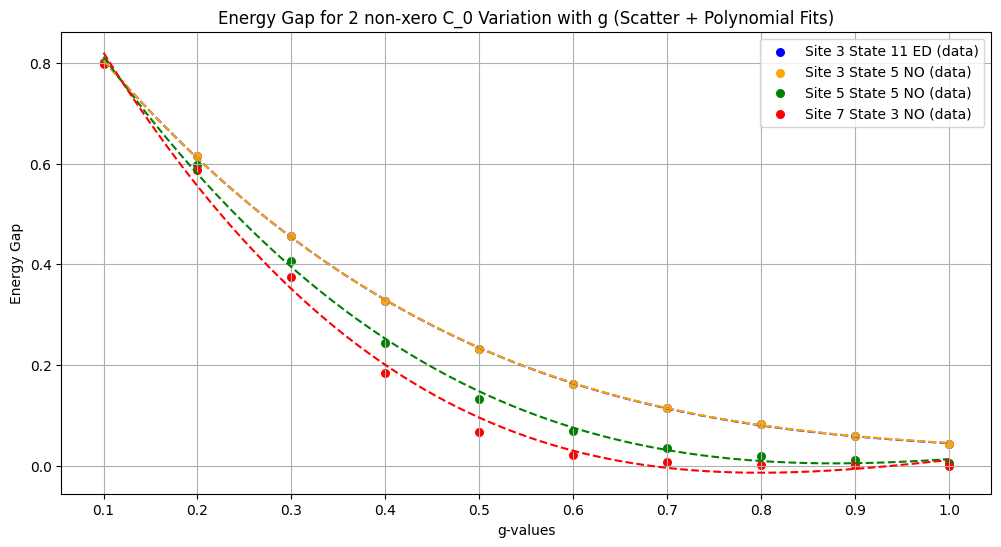

In [ ]:
si3_st11_ED = np.array(si3_st11_ED)
si3_st5_NO = np.array(si3_st5_NO)
si5_st5_NO = np.array(si5_st5_NO)
si7_st3_NO = np.array(si7_st3_NO)
g_array = np.array(g_array)

# plt.figure(figsize=(12, 6))

# bar(g_array, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO)

# # Axis formatting
# plt.xticks(g_array)
# plt.xlabel("g-values")
# plt.ylabel("Energy Gap")
# plt.title("Energy Gap variation with g.")
# plt.legend()

# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red']

scatter_and_fit(g_array, si3_st11_ED, 'Site 3 State 11 ED', colors[0])
scatter_and_fit(g_array, si3_st5_NO,  'Site 3 State 5 NO',  colors[1])
scatter_and_fit(g_array, si5_st5_NO,  'Site 5 State 5 NO',  colors[2])
scatter_and_fit(g_array, si7_st3_NO,  'Site 7 State 3 NO',  colors[3])

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("Energy Gap")
plt.title("Energy Gap for 2 non-xero C_0 Variation with g (Scatter + Polynomial Fits)")
plt.legend()
plt.grid(True)
plt.show()

# C_o variation for ground state energy.

In [ ]:
si3_st11_ED = []
si3_st5_NO = []
si5_st5_NO = []
si7_st3_NO = []

for g_index in range(12):
    g = g_array[g_index]
    
    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][1]]

    si3_st11_ED.append(C_1_0)

    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][1]]

    si3_st5_NO.append(C_1_0)

    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][1]]

    si5_st5_NO.append(C_1_0)
    
    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[0][1]]

    si7_st3_NO.append(C_1_0)


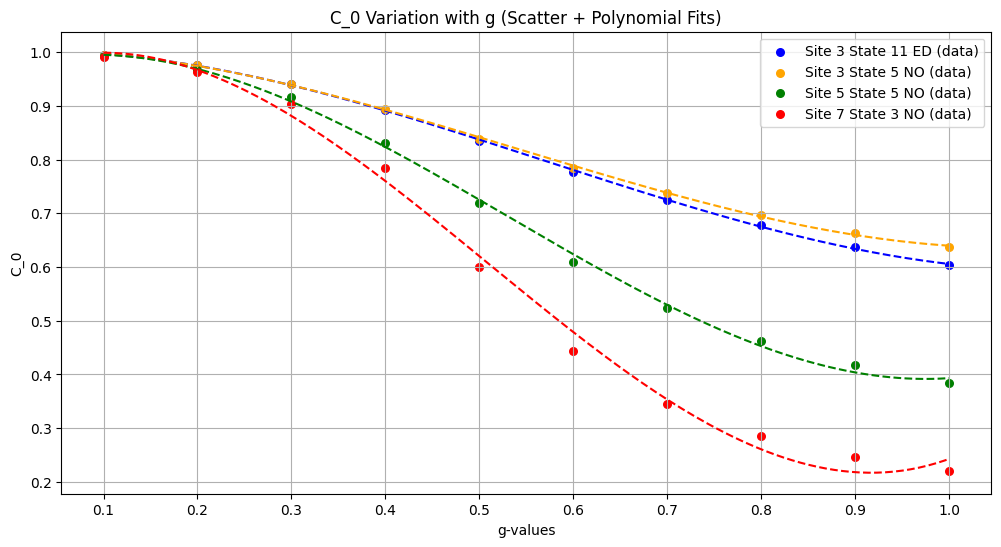

In [ ]:
si3_st11_ED = np.array(si3_st11_ED)
si3_st5_NO = np.array(si3_st5_NO)
si5_st5_NO = np.array(si5_st5_NO)
si7_st3_NO = np.array(si7_st3_NO)
g_array = np.array(g_array)

# plt.figure(figsize=(12, 6))

# bar(g_array, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO)

# # Axis formatting
# plt.xticks(g_array)
# plt.xlabel("g-values")
# plt.ylabel("C_0")
# plt.title("C_0 Variation with g.")
# plt.legend()

# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red']

scatter_and_fit(g_array, si3_st11_ED, 'Site 3 State 11 ED', colors[0])
scatter_and_fit(g_array, si3_st5_NO,  'Site 3 State 5 NO',  colors[1])
scatter_and_fit(g_array, si5_st5_NO,  'Site 5 State 5 NO',  colors[2])
scatter_and_fit(g_array, si7_st3_NO,  'Site 7 State 3 NO',  colors[3])

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("C_0")
plt.title("C_0 Variation with g (Scatter + Polynomial Fits)")
plt.legend()
plt.grid(True)
plt.show()

# C_0 variation for second smallest non-zero energystate.

In [ ]:
si3_st11_ED = []
si3_st5_NO = []
si5_st5_NO = []
si7_st3_NO = []

for g_index in range(12):
    g = g_array[g_index]

    eig_val, eig_vec = load_one_simulation_ED(3, 11, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][1]]

    si3_st11_ED.append(C_1_0)

    eig_val, eig_vec, _ = load_one_simulation_NO(3, 5, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][1]]

    si3_st5_NO.append(C_1_0)

    eig_val, eig_vec, _ = load_one_simulation_NO(5, 5, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][1]]

    si5_st5_NO.append(C_1_0)
    
    eig_val, eig_vec, _ = load_one_simulation_NO(7, 3, g, file_path_ED)

    C_1_0 = eig_vec[0, find_two_smallest_with_indices(eig_val, eig_vec[0,:])[1][1]]

    si7_st3_NO.append(C_1_0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


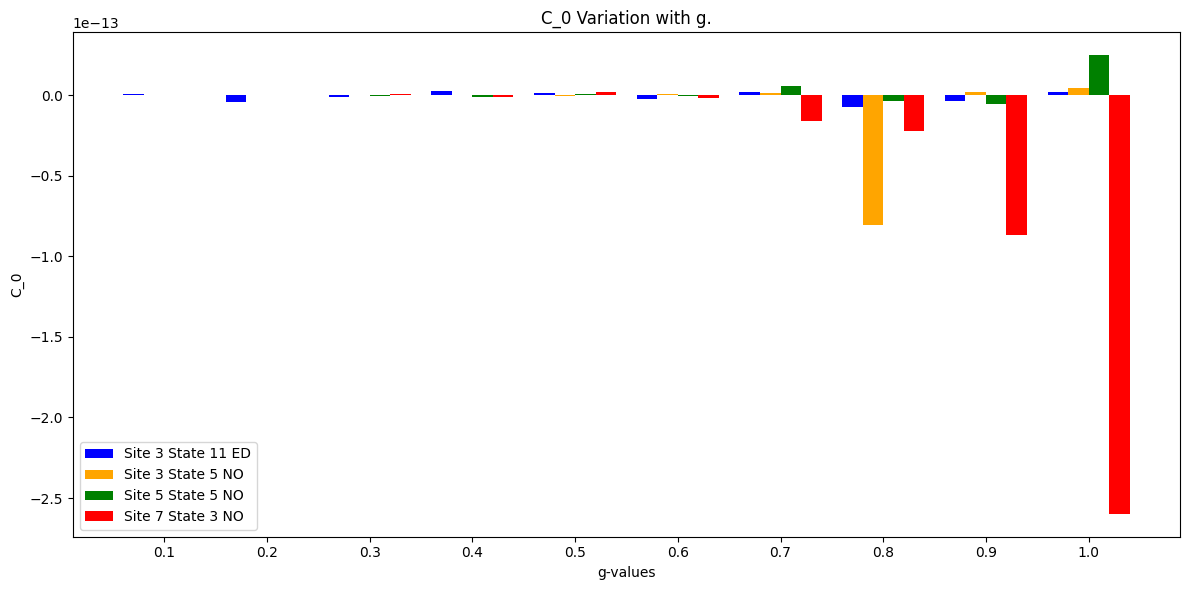

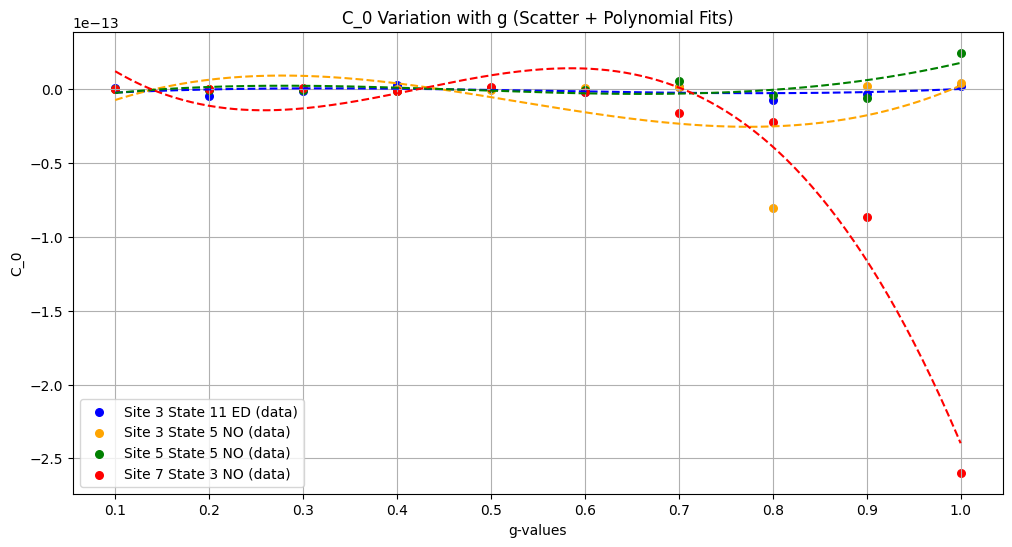

In [ ]:
si3_st11_ED = np.array(si3_st11_ED)
si3_st5_NO = np.array(si3_st5_NO)
si5_st5_NO = np.array(si5_st5_NO)
si7_st3_NO = np.array(si7_st3_NO)
g_array = np.array(g_array)

plt.figure(figsize=(12, 6))

bar(g_array, si3_st11_ED, si3_st5_NO, si5_st5_NO, si7_st3_NO)

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("C_0")
plt.title("C_0 Variation with g.")
plt.legend()

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red']

scatter_and_fit(g_array, si3_st11_ED, 'Site 3 State 11 ED', colors[0])
scatter_and_fit(g_array, si3_st5_NO,  'Site 3 State 5 NO',  colors[1])
scatter_and_fit(g_array, si5_st5_NO,  'Site 5 State 5 NO',  colors[2])
scatter_and_fit(g_array, si7_st3_NO,  'Site 7 State 3 NO',  colors[3])

# Axis formatting
plt.xticks(g_array)
plt.xlabel("g-values")
plt.ylabel("C_0")
plt.title("C_0 Variation with g (Scatter + Polynomial Fits)")
plt.legend()
plt.grid(True)
plt.show()

# T amplitudes for large systems.

In [ ]:
file_path_T_amplitudes = "./T_amplitudes_energy"
g_vals = np.array([0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3])
site_vals = np.array([3, 5, 7, 9, 11, 13, 15, 20, 25, 30])

## Save T amplitudes.

In [ ]:
# energy_matrix_5 = np.zeros((10, 10), dtype=complex)

# for g_index in range(10):
#     for site_index in range(10):
#             g = g_vals[g_index]
#             site = site_vals[site_index]

#             print(f"State 5, site {site}, g={g}.")

#             energy, t_1, t_2, diverge = t_periodic(site, 5, 1, 0, 0, 1e-8, g, 3,  False, 3, False, "sin")

#             energy_matrix_5[site_index, g_index] = energy

#             base = f"sites{site}_states{5}_g{g:.2f}"

#             # Save to .npy files
#             np.save(f"{file_path_T_amplitudes}/t_1{base}.npy", t_1)
#             np.save(f"{file_path_T_amplitudes}/t_2{base}.npy", t_2)

# np.save(f"{file_path_T_amplitudes}/energy_matrix_5.npy", energy_matrix_5)

In [ ]:
# energy_matrix_7 = np.zeros((10, 10), dtype=complex)

# for g_index in range(10):
#     for site_index in range(10):
#             g = g_vals[g_index]
#             site = site_vals[site_index]

#             print(f"State 7, site {site}, g={g}.")

#             energy, t_1, t_2, diverge = t_periodic(site, 7, 1, 0, 0, 1e-8, g, 3,  False, 3, False, "sin")

#             energy_matrix_7[site_index, g_index] = energy

#             base = f"sites{site}_states{7}_g{g:.2f}"

#             # Save to .npy files
#             np.save(f"{file_path_T_amplitudes}/t_1{base}.npy", t_1)
#             np.save(f"{file_path_T_amplitudes}/t_2{base}.npy", t_2)

# np.save(f"{file_path_T_amplitudes}/energy_matrix_7.npy", energy_matrix_7)

## Graph t amplitudes for large systems.

In [ ]:
t_1_amplitude_matrix_5 = np.zeros((10, 10))
t_2_amplitude_matrix_5 = np.zeros((10, 10))

for g_index in range(10):
    for site_index in range(10):
            g = g_vals[g_index]
            site = site_vals[site_index]

            t_1, t_2 = load_one_simulation_t_amplitudes(site, 5, g, file_path_T_amplitudes)
            
            largest_t_1 = np.max(np.abs(t_1))
            largest_t_2 = np.max(np.abs(t_2))

            t_1_amplitude_matrix_5[site_index, g_index] = largest_t_1
            t_2_amplitude_matrix_5[site_index, g_index] = largest_t_2

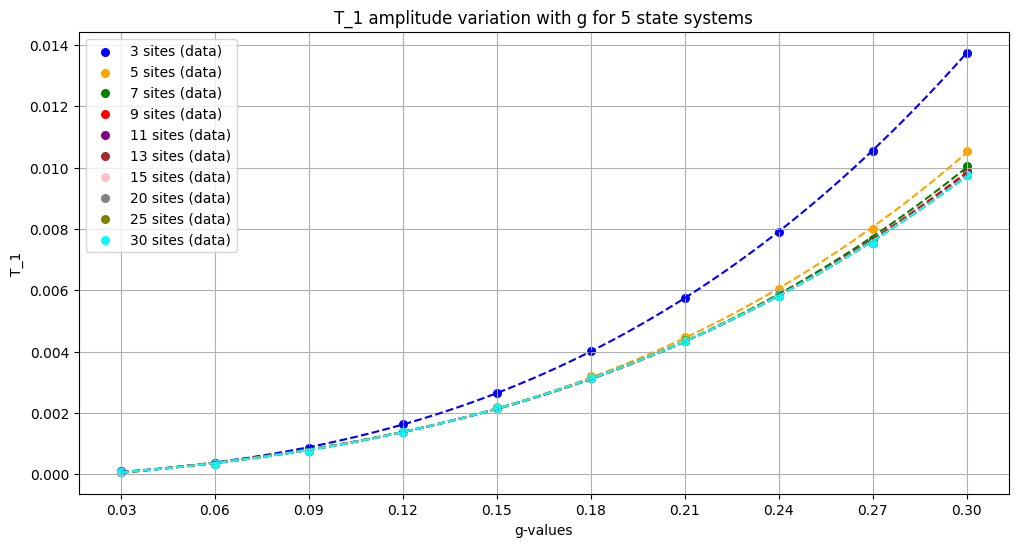

In [ ]:
t_1_3 = t_1_amplitude_matrix_5[0, :]
t_1_5 = t_1_amplitude_matrix_5[1, :]
t_1_7 = t_1_amplitude_matrix_5[2, :]
t_1_9 = t_1_amplitude_matrix_5[3, :]
t_1_11 = t_1_amplitude_matrix_5[4, :]
t_1_13 = t_1_amplitude_matrix_5[5, :]
t_1_15 = t_1_amplitude_matrix_5[6, :]
t_1_20 = t_1_amplitude_matrix_5[7, :]
t_1_25 = t_1_amplitude_matrix_5[8, :]
t_1_30 = t_1_amplitude_matrix_5[9, :]

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

scatter_and_fit(g_vals, t_1_3, '3 sites', colors[0])
scatter_and_fit(g_vals, t_1_5, '5 sites',  colors[1])
scatter_and_fit(g_vals, t_1_7, '7 sites',  colors[2])
scatter_and_fit(g_vals, t_1_9, '9 sites',  colors[3])
scatter_and_fit(g_vals, t_1_11, '11 sites',  colors[4])
scatter_and_fit(g_vals, t_1_13, '13 sites',  colors[5])
scatter_and_fit(g_vals, t_1_15, '15 sites',  colors[6])
scatter_and_fit(g_vals, t_1_20, '20 sites',  colors[7])
scatter_and_fit(g_vals, t_1_25, '25 sites',  colors[8])
scatter_and_fit(g_vals, t_1_30, '30 sites',  colors[9])

# Axis formatting
plt.xticks(g_vals)
plt.xlabel("g-values")
plt.ylabel("T_1")
plt.title("T_1 amplitude variation with g for 5 state systems")
plt.legend()
plt.grid(True)
plt.show()

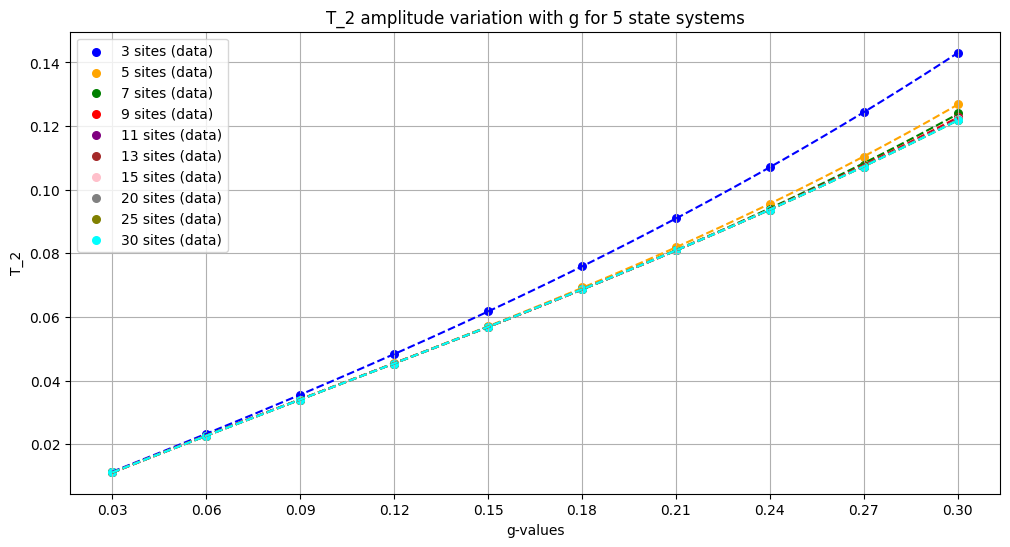

In [ ]:
t_2_3 = t_2_amplitude_matrix_5[0, :]
t_2_5 = t_2_amplitude_matrix_5[1, :]
t_2_7 = t_2_amplitude_matrix_5[2, :]
t_2_9 = t_2_amplitude_matrix_5[3, :]
t_2_11 = t_2_amplitude_matrix_5[4, :]
t_2_13 = t_2_amplitude_matrix_5[5, :]
t_2_15 = t_2_amplitude_matrix_5[6, :]
t_2_20 = t_2_amplitude_matrix_5[7, :]
t_2_25 = t_2_amplitude_matrix_5[8, :]
t_2_30 = t_2_amplitude_matrix_5[9, :]

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

scatter_and_fit(g_vals, t_2_3, '3 sites', colors[0])
scatter_and_fit(g_vals, t_2_5, '5 sites',  colors[1])
scatter_and_fit(g_vals, t_2_7, '7 sites',  colors[2])
scatter_and_fit(g_vals, t_2_9, '9 sites',  colors[3])
scatter_and_fit(g_vals, t_2_11, '11 sites',  colors[4])
scatter_and_fit(g_vals, t_2_13, '13 sites',  colors[5])
scatter_and_fit(g_vals, t_2_15, '15 sites',  colors[6])
scatter_and_fit(g_vals, t_2_20, '20 sites',  colors[7])
scatter_and_fit(g_vals, t_2_25, '25 sites',  colors[8])
scatter_and_fit(g_vals, t_2_30, '30 sites',  colors[9])

# Axis formatting
plt.xticks(g_vals)
plt.xlabel("g-values")
plt.ylabel("T_2")
plt.title("T_2 amplitude variation with g for 5 state systems")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
t_1_amplitude_matrix_7 = np.zeros((10, 10))
t_2_amplitude_matrix_7 = np.zeros((10, 10))

for g_index in range(10):
    for site_index in range(10):
            g = g_vals[g_index]
            site = site_vals[site_index]

            t_1, t_2 = load_one_simulation_t_amplitudes(site, 7, g, file_path_T_amplitudes)

            largest_t_2 = np.max(np.abs(t_2))
            largest_t_1 = np.max(np.abs(t_1))

            t_1_amplitude_matrix_7[site_index, g_index] = largest_t_1
            t_2_amplitude_matrix_7[site_index, g_index] = largest_t_2

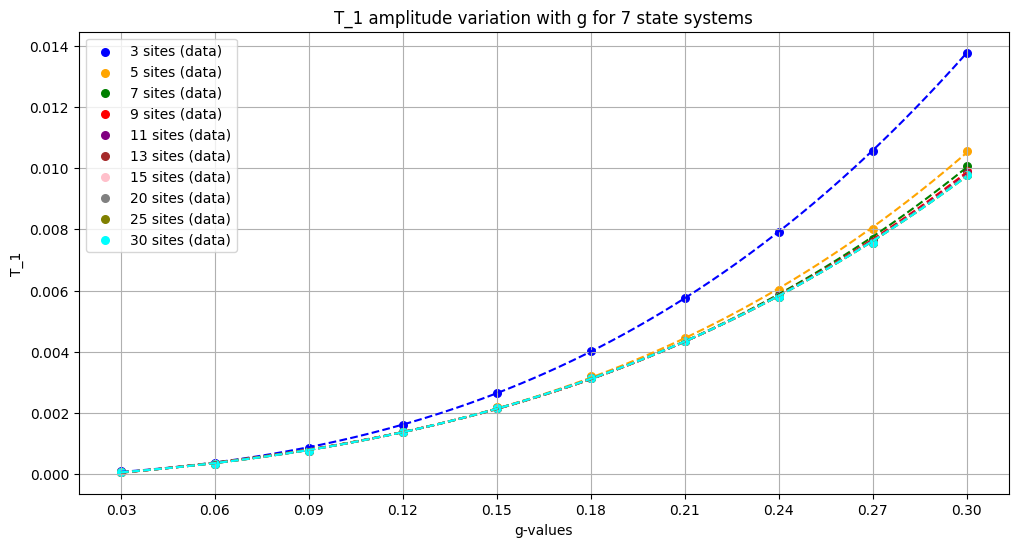

In [ ]:
t_1_3 = t_1_amplitude_matrix_7[0, :]
t_1_5 = t_1_amplitude_matrix_7[1, :]
t_1_7 = t_1_amplitude_matrix_7[2, :]
t_1_9 = t_1_amplitude_matrix_7[3, :]
t_1_11 = t_1_amplitude_matrix_7[4, :]
t_1_13 = t_1_amplitude_matrix_7[5, :]
t_1_15 = t_1_amplitude_matrix_7[6, :]
t_1_20 = t_1_amplitude_matrix_7[7, :]
t_1_25 = t_1_amplitude_matrix_7[8, :]
t_1_30 = t_1_amplitude_matrix_7[9, :]

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

scatter_and_fit(g_vals, t_1_3, '3 sites', colors[0])
scatter_and_fit(g_vals, t_1_5, '5 sites',  colors[1])
scatter_and_fit(g_vals, t_1_7, '7 sites',  colors[2])
scatter_and_fit(g_vals, t_1_9, '9 sites',  colors[3])
scatter_and_fit(g_vals, t_1_11, '11 sites',  colors[4])
scatter_and_fit(g_vals, t_1_13, '13 sites',  colors[5])
scatter_and_fit(g_vals, t_1_15, '15 sites',  colors[6])
scatter_and_fit(g_vals, t_1_20, '20 sites',  colors[7])
scatter_and_fit(g_vals, t_1_25, '25 sites',  colors[8])
scatter_and_fit(g_vals, t_1_30, '30 sites',  colors[9])

# Axis formatting
plt.xticks(g_vals)
plt.xlabel("g-values")
plt.ylabel("T_1")
plt.title("T_1 amplitude variation with g for 7 state systems")
plt.legend()
plt.grid(True)
plt.show()

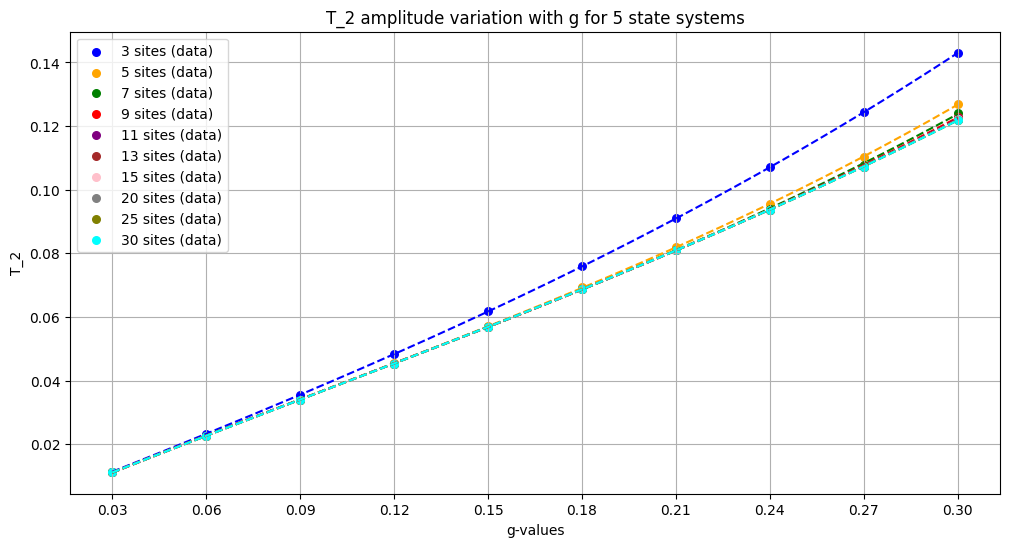

In [ ]:
t_2_3 = t_2_amplitude_matrix_7[0, :]
t_2_5 = t_2_amplitude_matrix_7[1, :]
t_2_7 = t_2_amplitude_matrix_7[2, :]
t_2_9 = t_2_amplitude_matrix_7[3, :]
t_2_11 = t_2_amplitude_matrix_7[4, :]
t_2_13 = t_2_amplitude_matrix_7[5, :]
t_2_15 = t_2_amplitude_matrix_7[6, :]
t_2_20 = t_2_amplitude_matrix_7[7, :]
t_2_25 = t_2_amplitude_matrix_7[8, :]
t_2_30 = t_2_amplitude_matrix_7[9, :]

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

scatter_and_fit(g_vals, t_2_3, '3 sites', colors[0])
scatter_and_fit(g_vals, t_2_5, '5 sites',  colors[1])
scatter_and_fit(g_vals, t_2_7, '7 sites',  colors[2])
scatter_and_fit(g_vals, t_2_9, '9 sites',  colors[3])
scatter_and_fit(g_vals, t_2_11, '11 sites',  colors[4])
scatter_and_fit(g_vals, t_2_13, '13 sites',  colors[5])
scatter_and_fit(g_vals, t_2_15, '15 sites',  colors[6])
scatter_and_fit(g_vals, t_2_20, '20 sites',  colors[7])
scatter_and_fit(g_vals, t_2_25, '25 sites',  colors[8])
scatter_and_fit(g_vals, t_2_30, '30 sites',  colors[9])

# Axis formatting
plt.xticks(g_vals)
plt.xlabel("g-values")
plt.ylabel("T_2")
plt.title("T_2 amplitude variation with g for 5 state systems")
plt.legend()
plt.grid(True)
plt.show()

# Graph Energy difference for large systems.

In [ ]:
log_energy_diff = np.zeros((10, 10))

for g_index in range(10):
    for site_index in range(10):
            g = g_vals[g_index]
            site = site_vals[site_index]

            energy_matrix_5 = np.load(f"{file_path_T_amplitudes}/energy_matrix_5.npy")
            energy_matrix_7 = np.load(f"{file_path_T_amplitudes}/energy_matrix_7.npy")

            log_energy_diff[site_index, g_index] = np.log10(energy_matrix_5[site_index, g_index]/site - energy_matrix_7[site_index, g_index]/site)

            # log_energy_diff[site_index, g_index] = np.log(energy_matrix_5[site_index, g_index]/site - energy_matrix_7[site_index, g_index]/site) / np.log()

/var/folders/vt/f4sbj2d11gbbb9q5816khz2m0000gn/T/ipykernel_70960/3163175557.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  log_energy_diff[site_index, g_index] = np.log10(energy_matrix_5[site_index, g_index]/site - energy_matrix_7[site_index, g_index]/site)


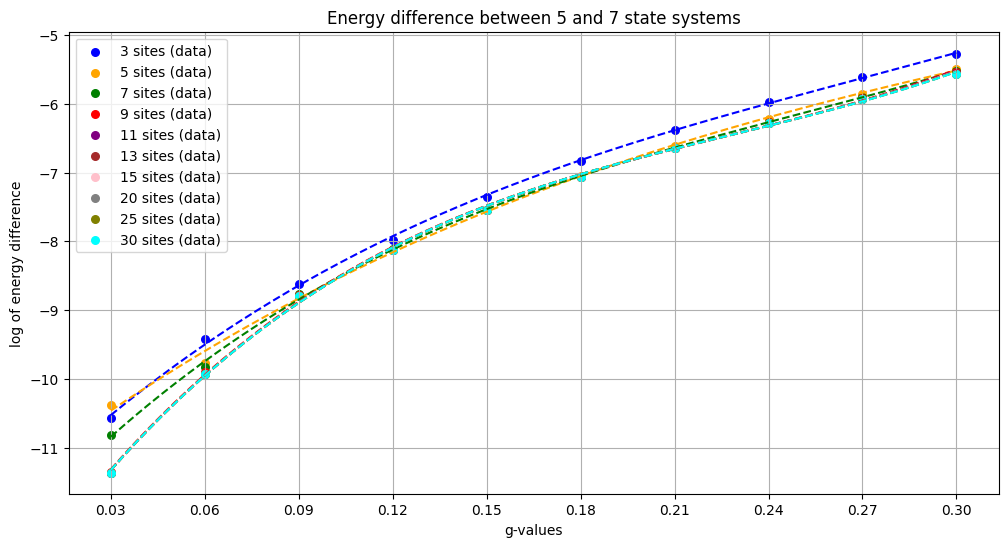

In [ ]:
t_1_3 = log_energy_diff[0, :]
t_1_5 = log_energy_diff[1, :]
t_1_7 = log_energy_diff[2, :]
t_1_9 = log_energy_diff[3, :]
t_1_11 = log_energy_diff[4, :]
t_1_13 = log_energy_diff[5, :]
t_1_15 = log_energy_diff[6, :]
t_1_20 = log_energy_diff[7, :]
t_1_25 = log_energy_diff[8, :]
t_1_30 = log_energy_diff[9, :]

plt.figure(figsize=(12, 6))

# Use consistent colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

scatter_and_fit(g_vals, t_1_3, '3 sites', colors[0])
scatter_and_fit(g_vals, t_1_5, '5 sites',  colors[1])
scatter_and_fit(g_vals, t_1_7, '7 sites',  colors[2])
scatter_and_fit(g_vals, t_1_9, '9 sites',  colors[3])
scatter_and_fit(g_vals, t_1_11, '11 sites',  colors[4])
scatter_and_fit(g_vals, t_1_13, '13 sites',  colors[5])
scatter_and_fit(g_vals, t_1_15, '15 sites',  colors[6])
scatter_and_fit(g_vals, t_1_20, '20 sites',  colors[7])
scatter_and_fit(g_vals, t_1_25, '25 sites',  colors[8])
scatter_and_fit(g_vals, t_1_30, '30 sites',  colors[9])

# Axis formatting
plt.xticks(g_vals)
plt.xlabel("g-values")
plt.ylabel("log of energy difference")
plt.title("Energy difference between 5 and 7 state systems")
plt.legend()
plt.grid(True)
plt.show()

## T_amplitude decay for large systems

In [ ]:
def upper_triangle_index(a, b, n):
    return (2 * n - a + 1) * a // 2 + (b - a)

In [ ]:
sites = 30
states = 5
amplitude_per_site_matrix = np.zeros((30), dtype=complex)

t_1, t_2 = load_one_simulation_t_amplitudes(sites, states, 0.21, file_path_T_amplitudes)

for site in range(1, sites-1):

    amplitude_per_site_matrix[site] = np.log10(np.max(np.abs(t_2[0, site])))

In [ ]:
amplitude_per_site_matrix[15]

(-7.071815863626483+0j)

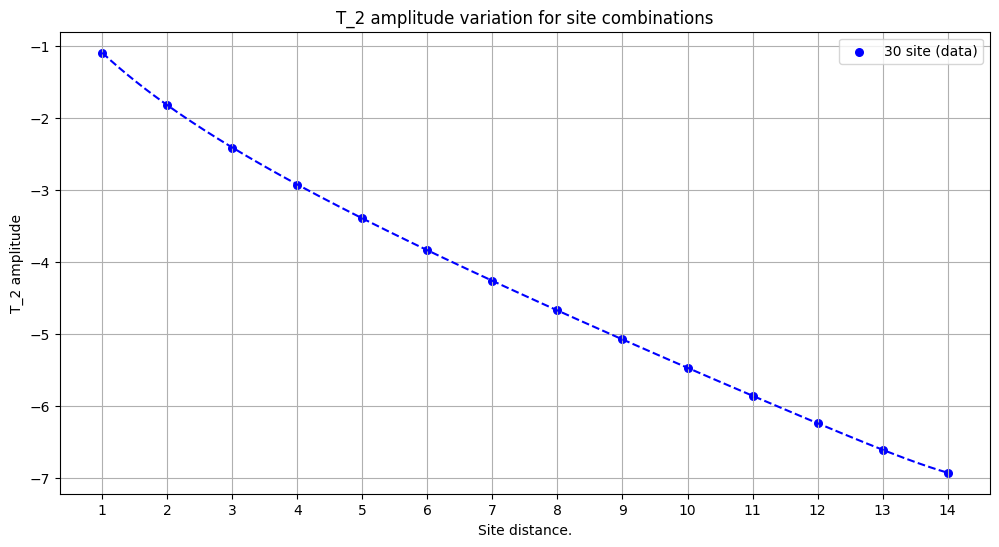

In [ ]:
x = np.arange(1, 15)

t_per_site = amplitude_per_site_matrix[1:15]

plt.figure(figsize=(12, 6))

scatter_and_fit(x, t_per_site, "30 site", color='blue', degree=10)

# Axis formatting
plt.xticks(x)
plt.xlabel("Site distance.")
plt.ylabel("T_2 amplitude")
plt.title(f"T_2 amplitude variation for site combinations")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def convert_i_to_site_state(states: int, sites: int, looking_for_site: int) -> np.ndarray:

    for x in range(sites):

        n_lambda = states**(x)
        n_mu = states**(sites - x - 1)
        # Loop over the local states at the chosen site
        for p in range(states):

            # Sum over all other sites (Lambda and mu represent other sites)
            for Lambda in range(int(n_lambda)):
                for mu in range(int(n_mu)):

                    # Full indices in the Hilbert space
                    i = mu + p * n_mu + Lambda * states * n_mu

                    if i == looking_for_site:
                        return x, p

In [ ]:

# H = hamiltonian_general(states, sites, 1)[0]
# eig_val_D, eig_vec_D = np.linalg.eig(H)

In [ ]:
hamiltonian_big

<function quant_rotor.core.hamiltonian_big.hamiltonian_big(state: int, site: int, g_val: float, H_K_V: list[numpy.ndarray], l_val: float = 0) -> numpy.ndarray>

In [ ]:
sites = 5
states = 5
g = 0.2

H_K_V = hamiltonian(11, 3, g)
H = hamiltonian_big(states, sites, g, H_K_V)
eig_val, eig_vec = np.linalg.eig(H[0])
index_array = np.argsort(eig_val)
eig_val[index_array]

array([-0.127726646438-0.j,  0.470343712612-0.j,  0.749926787241-0.j,  0.749926787241-0.j,  0.827797725236-0.j,  0.827797725236+0.j,  0.979295972776-0.j,  0.979295972776-0.j,  1.099715335934+0.j,  1.218329288951+0.j,  1.218329288951+0.j,  1.284466316474+0.j,  1.456589598453+0.j,  1.456589598453-0.j,  1.623805477132+0.j,  1.623805477132+0.j,  1.68286173913 -0.j,  1.68286173913 +0.j,  1.753031588963-0.j,  1.755336302022+0.j,  1.755336302022+0.j,  1.773857265227-0.j,  1.773857265227+0.j,  1.783278411246+0.j,  1.783278411246+0.j,  1.815910103613-0.j,  1.815910103613+0.j,  1.827200040102-0.j,  1.892193649894+0.j,  1.892193649894-0.j,  1.903919878639-0.j,  1.988420145316-0.j,  1.988420145316+0.j,  2.012804509323-0.j,  2.042560407148-0.j,  2.042560407148+0.j,  2.05109271871 +0.j,  2.05109271871 -0.j,  2.061870515204-0.j,  2.061870515204+0.j,  2.087110131367-0.j,  2.112420624865-0.j,  2.112420624865+0.j,  2.207429146385+0.j,  2.246931085809-0.j,  2.246931085809+0.j,  2.261861984398+0.j,  2.332

In [ ]:
H[3]

In [ ]:
H[4]

In [ ]:
# sites = 5
# states = 5

# H = hamiltonian_general(states, sites, 5)[0]
# eig_val_D, eig_vec_D = np.linalg.eig(H)
# index_array = np.argsort(eig_val)
# eig_val[index_array]

In [ ]:
num_eig_val = 10

D_sum = np.zeros((states, states), dtype=complex)
D_avg = np.zeros((states, states), dtype=complex)

for i in range(num_eig_val):
    D_1 = density_matrix_1(states, sites, eig_vec[:, index_array[i]], convert_i_to_site_state(states, sites, index_array[i])[0])
    D_sum += D_1

D_avg = D_sum / num_eig_val

print(np.trace(D_avg))

(1.0000000000000009+0j)


In [ ]:
eig_val_D, eig_vec_D = np.linalg.eig(D_avg)

In [ ]:
index_array_D = np.argsort(-eig_val_D)
eig_val_D[index_array_D]

array([0.505994180081-0.j, 0.323145479699-0.j, 0.141832234117+0.j, 0.0260174659  -0.j, 0.003010640203+0.j])

In [ ]:
eig_vec_D[:, index_array_D]

array([[ 0.999608782694+0.j,  0.            -0.j, -0.            -0.j,  0.            +0.j, -0.027969296753-0.j],
       [-0.            -0.j,  1.            +0.j,  0.            +0.j, -0.            -0.j,  0.            -0.j],
       [ 0.            -0.j, -0.            -0.j,  1.            +0.j,  0.            -0.j, -0.            -0.j],
       [-0.            +0.j,  0.            +0.j, -0.            +0.j,  1.            +0.j, -0.            +0.j],
       [ 0.027969296753-0.j, -0.            -0.j,  0.            +0.j,  0.            -0.j,  0.999608782694+0.j]])